# 1. Data Exploration

## Loading and visualizing our data

In [1]:
import kagglehub
import os

dataset_path = "/kaggle/input/garbage-classification-v2/garbage-dataset"

# Get the list of class names (subdirectories inside RealWaste)
waste_categories = sorted(os.listdir(dataset_path))

# Print the categories
print("Waste Categories:", waste_categories)

Waste Categories: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']


In [2]:
from random import sample
import pandas as pd

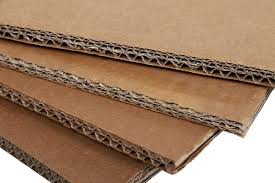

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img1 = load_img(f"{dataset_path}/cardboard/cardboard_1123.jpg")
img1

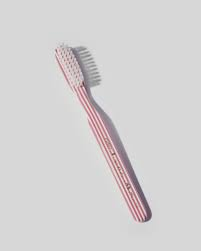

In [4]:
img2 = load_img(f"{dataset_path}/trash/trash_111.jpg")
img2

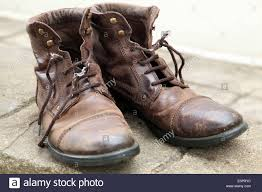

In [5]:
img3 = load_img(f"{dataset_path}/shoes/shoes_111.jpg")
img3

In [6]:
from PIL import Image  
import os
import matplotlib.pyplot as plt
from random import sample

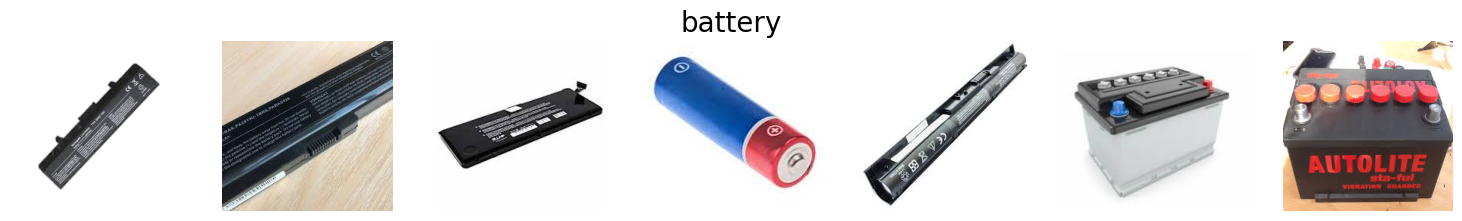

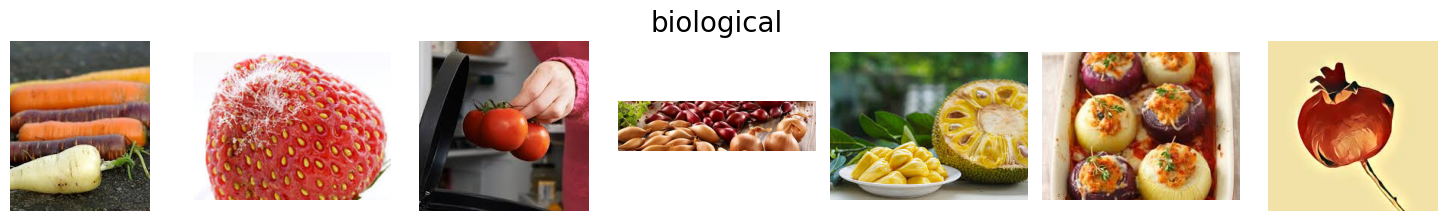

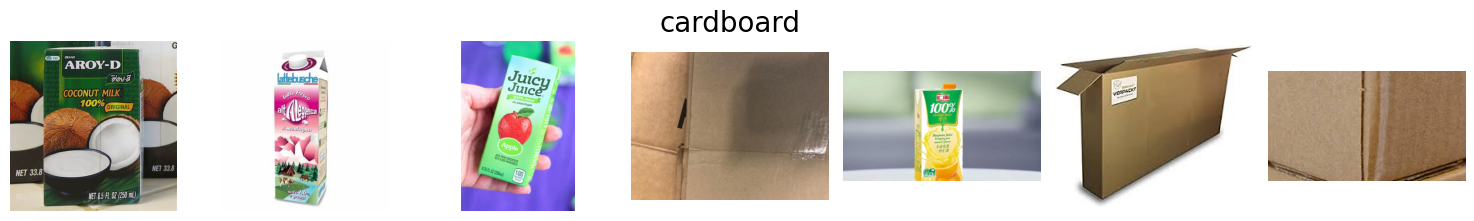

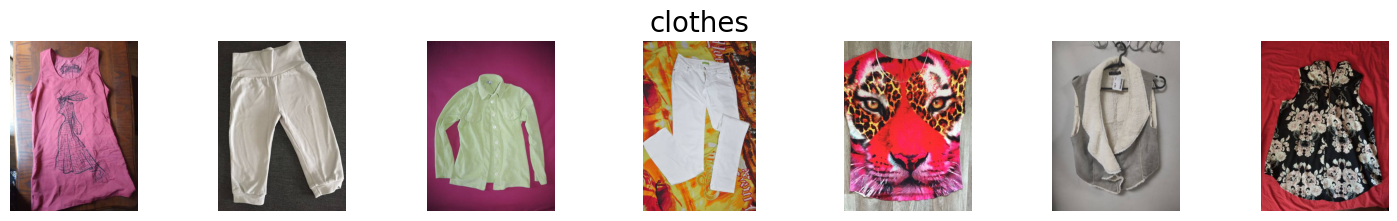

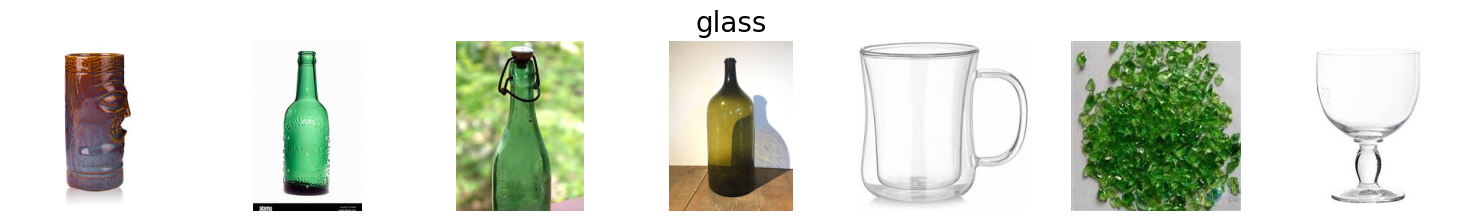

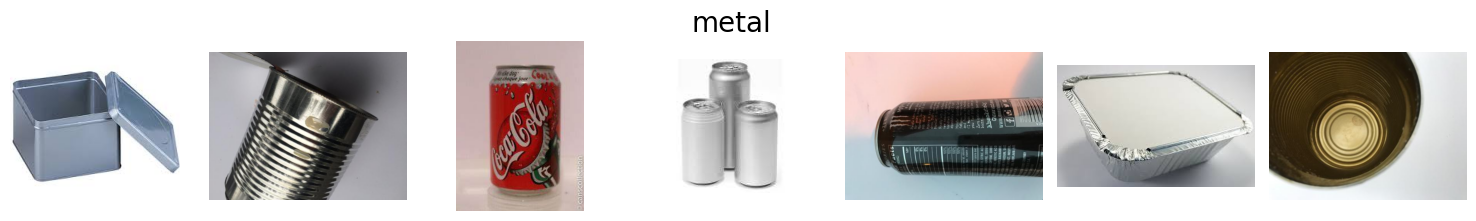

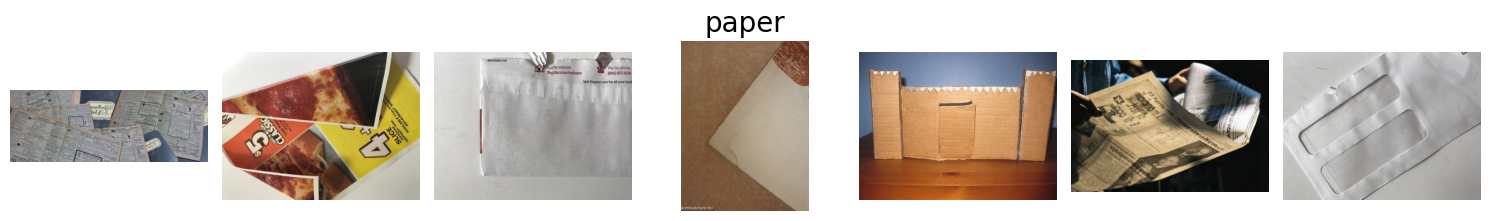

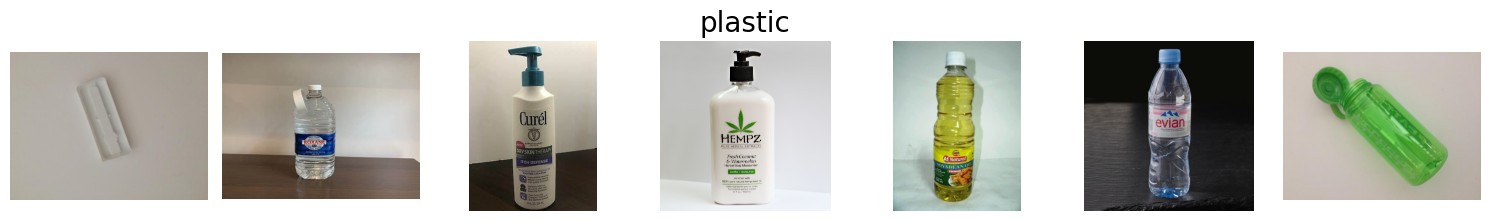

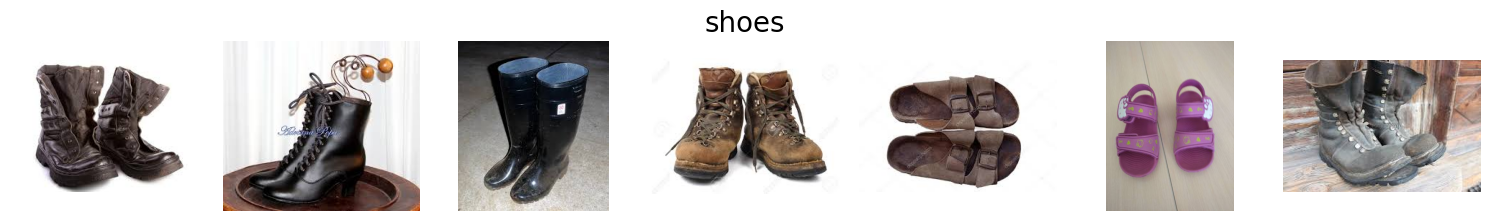

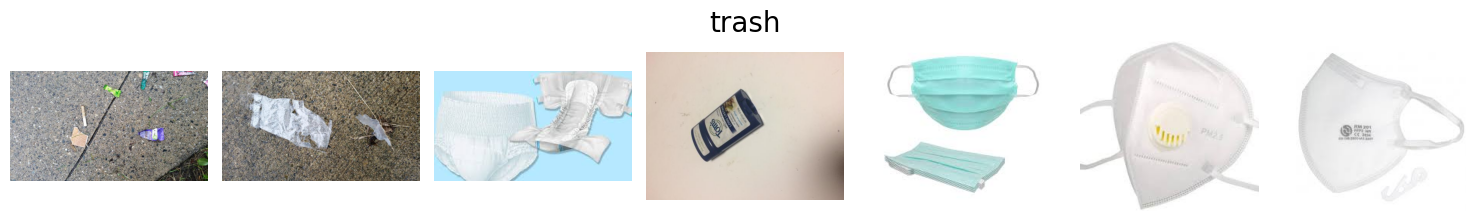

In [7]:
# Iterate over each trash type (folder) to display images
for waste_category in waste_categories:
    folder_path = os.path.join(dataset_path, waste_category)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Select 7 random images
        image_files = sample(image_files,7)

        # Set up subplots
        fig, axs = plt.subplots(1, 7, figsize=(15, 2))
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                axs[i].imshow(img)
                axs[i].axis('off')
        
        plt.tight_layout()
        fig.suptitle(waste_category, fontsize=20, y=1.08)
        plt.show()

## Checking image dimensions, properties and class distribution

In [8]:
import os
from PIL import Image

## Check Image Dimensions Before Splitting

# Retrieve the names of all folders (waste categories)
waste_categories = os.listdir(dataset_path)

# Set to store unique image dimensions
all_dimensions_set = set()

# Iterate over each category (folder) to process images
for category in waste_categories:
    folder_path = os.path.join(dataset_path, category)

    # Verify it's a valid directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png'))]

        # Display the count of images in the current folder
        print(f"{category} folder contains {len(image_files)} images.")

        # Loop through each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                width, height = img.size
                channels = len(img.getbands())
                all_dimensions_set.add((width, height, channels))

# Print summary of image dimensions
if len(all_dimensions_set) == 1:
    width, height, channels = all_dimensions_set.pop()
    print(f"\n✅ All images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    print("\n⚠️ The images in the dataset have different dimensions or color channels:")
    print(all_dimensions_set)

metal folder contains 1020 images.
glass folder contains 3061 images.
biological folder contains 997 images.
paper folder contains 1680 images.
battery folder contains 944 images.
trash folder contains 947 images.
cardboard folder contains 1825 images.
shoes folder contains 1977 images.
clothes folder contains 5327 images.
plastic folder contains 1984 images.

⚠️ The images in the dataset have different dimensions or color channels:
{(263, 192, 3), (715, 500, 3), (451, 112, 3), (1000, 750, 3), (457, 457, 3), (963, 933, 3), (900, 675, 3), (400, 610, 3), (613, 400, 3), (300, 273, 3), (400, 823, 3), (330, 313, 3), (364, 273, 3), (494, 800, 3), (534, 400, 3), (400, 477, 3), (766, 766, 3), (598, 400, 3), (196, 257, 4), (224, 218, 3), (720, 638, 3), (405, 273, 3), (200, 252, 3), (210, 280, 3), (473, 605, 3), (400, 428, 3), (293, 800, 3), (156, 324, 3), (1152, 1920, 3), (2031, 1458, 3), (768, 1024, 3), (318, 499, 3), (400, 641, 3), (433, 576, 3), (4056, 2704, 3), (200, 253, 3), (258, 270, 3),

# Copy to new working directory and remove files not accepted by our model later on

In [9]:
import shutil
from pathlib import Path
import imghdr

In [10]:
data_dir = '/kaggle/input/garbage-classification-v2/'

In [11]:
def remove_folder_contents(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

folder_path = '/kaggle/working'
remove_folder_contents(folder_path)
# os.rmdir(folder_path)

In [12]:
shutil.copytree(data_dir, '/kaggle/working/dataset')

'/kaggle/working/dataset'

In [13]:
data_dir  = '/kaggle/working/dataset'

In [14]:
count=0
image_extensions = [".png", ".jpg"] 
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]

for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        if img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)
            count+=1
print(f"Removed {count} images")

/kaggle/working/dataset/garbage-dataset/metal/metal_1441.jpg is not an image
/kaggle/working/dataset/garbage-dataset/metal/metal_1441.jpg is a None, not accepted by TensorFlow
/kaggle/working/dataset/garbage-dataset/plastic/plastic_699.jpg is not an image
/kaggle/working/dataset/garbage-dataset/plastic/plastic_699.jpg is a None, not accepted by TensorFlow
/kaggle/working/dataset/garbage-dataset/plastic/plastic_603.jpg is not an image
/kaggle/working/dataset/garbage-dataset/plastic/plastic_603.jpg is a None, not accepted by TensorFlow
/kaggle/working/dataset/garbage-dataset/plastic/plastic_1096.jpg is not an image
/kaggle/working/dataset/garbage-dataset/plastic/plastic_1096.jpg is a None, not accepted by TensorFlow
/kaggle/working/dataset/garbage-dataset/plastic/plastic_553.jpg is not an image
/kaggle/working/dataset/garbage-dataset/plastic/plastic_553.jpg is a None, not accepted by TensorFlow
/kaggle/working/dataset/garbage-dataset/plastic/plastic_2631.jpg is not an image
/kaggle/worki

## Creating a dataframe to prepare for preprocessing 

In [15]:
# Initialize an empty list to store image file paths and their respective labels
data = []

# Loop through each waste type and collect its images' file paths
for waste_category in waste_categories:
    for file in os.listdir(os.path.join(dataset_path, waste_category)):
        # Append the image file path and its trash type (as a label) to the data list
        data.append((os.path.join(dataset_path, waste_category, file), waste_category))

# Convert the collected data into a DataFrame
df = pd.DataFrame(data, columns=['filepath', 'label'])

# Display the first few entries of the DataFrame
df.sample(20)

filepath       label
6741   /kaggle/input/garbage-classification-v2/garbag...       paper
15714  /kaggle/input/garbage-classification-v2/garbag...     clothes
8275   /kaggle/input/garbage-classification-v2/garbag...       trash
11241  /kaggle/input/garbage-classification-v2/garbag...       shoes
2142   /kaggle/input/garbage-classification-v2/garbag...       glass
4005   /kaggle/input/garbage-classification-v2/garbag...       glass
12900  /kaggle/input/garbage-classification-v2/garbag...     clothes
11382  /kaggle/input/garbage-classification-v2/garbag...       shoes
2895   /kaggle/input/garbage-classification-v2/garbag...       glass
4015   /kaggle/input/garbage-classification-v2/garbag...       glass
219    /kaggle/input/garbage-classification-v2/garbag...       metal
18975  /kaggle/input/garbage-classification-v2/garbag...     plastic
5890   /kaggle/input/garbage-classification-v2/garbag...       paper
15018  /kaggle/input/garbage-classification-v2/garbag...     clothes
4531   /kaggle/input/garbage-classification-v2/garbag...  biological
18491  /kaggle/input/garbage-classification-v2/garbag...     plastic
13737  /kaggle/input/garbage-classification-v2/garbag...     clothes
534    /kaggle/input/garbage-classification-v2/garbag...       metal
7709   /kaggle/input/garbage-classification-v2/garbag...       trash
15154  /kaggle/input/garbage-classification-v2/garbag...     clothes

# 2. Data Preprocessing

In [16]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

from tensorflow.keras.utils import image_dataset_from_directory

from sklearn.model_selection import train_test_split

# 3. Data Preprocessing

In [17]:
!pip install split-folders

## Data splitting for model training

In [18]:
dataset_path = "/kaggle/working/dataset/garbage-dataset"
print(os.listdir(dataset_path))  # Check if it contains the classes


['metal', 'biological', 'shoes', 'plastic', 'cardboard', 'clothes', 'glass', 'trash', 'paper', 'battery']


In [19]:
import splitfolders

# Define destination (writable) directory in Kaggle
dataset_path = "/kaggle/working/dataset/garbage-dataset"
output_path = "/kaggle/working/garbage_dataset_split_data"

splitfolders.ratio(dataset_path, output=output_path, seed=1337, ratio=(0.7, 0.1, 0.2))

# Define split ratios
split_ratios = (0.7, 0.1, 0.2)  # Train: 70%, Val: 10%, Test: 20%

# Split the dataset
splitfolders.ratio(dataset_path, output=output_path, seed=1337, ratio=split_ratios)

print("✅ Dataset successfully split into Train (70%), Val (10%), and Test (20%) with stratification!")

Copying files: 19709 files [00:03, 6533.45 files/s]
Copying files: 19709 files [00:04, 4836.41 files/s]

✅ Dataset successfully split into Train (70%), Val (10%), and Test (20%) with stratification!


## Define paths

In [20]:
# Define Paths for Your Dataset
train_data_dir = "/kaggle/working/garbage_dataset_split_data/train"
val_data_dir = "/kaggle/working/garbage_dataset_split_data/val"
test_data_dir = "/kaggle/working/garbage_dataset_split_data/test"

# Define Batch Size
batch_size = 64

In [21]:
# Delete the old unsplit dataset folder to save space
try:
    shutil.rmtree(dataset_path)
except OSError as e:
    print("Error: %s : %s" % (data_dir, e.strerror))

## Looking at class imbalance and weights

In [22]:
# Initialize empty lists to store image file paths and their respective labels
data = []
train = []
test = []
val = []

# Loop through each train-val-test folder and then garbage type and collect its images' file paths

dataset_path = '/kaggle/working/garbage_dataset_split_data'

data_set_types = os.listdir(dataset_path)

for data_set in data_set_types:

    folder_path = os.path.join(dataset_path, data_set)
    if os.path.isdir(folder_path):

        garbage_types = os.listdir(folder_path)
        for garbage_type in garbage_types:
            for file in os.listdir(os.path.join(folder_path, garbage_type)):
            # Append the image file path and its trash type (as a label) to the data list
                data.append((os.path.join(dataset_path, folder_path, garbage_type, file), garbage_type))
                if data_set == 'train':
                    train.append((os.path.join(dataset_path, folder_path, garbage_type, file), garbage_type))
                elif data_set == 'test':
                    test.append((os.path.join(dataset_path, folder_path, garbage_type, file), garbage_type))
                elif data_set == 'val':
                    val.append((os.path.join(dataset_path, folder_path, garbage_type, file), garbage_type))

# Convert the collected data into a DataFrame
df = pd.DataFrame(data, columns=['filepath', 'label'])
train_df = pd.DataFrame(train, columns=['filepath', 'label'])
test_df = pd.DataFrame(test, columns=['filepath', 'label'])
val_df = pd.DataFrame(val, columns=['filepath', 'label'])

# Display the first few entries of the DataFrame
df.head()

filepath  label
0  /kaggle/working/garbage_dataset_split_data/tra...  metal
1  /kaggle/working/garbage_dataset_split_data/tra...  metal
2  /kaggle/working/garbage_dataset_split_data/tra...  metal
3  /kaggle/working/garbage_dataset_split_data/tra...  metal
4  /kaggle/working/garbage_dataset_split_data/tra...  metal

In [23]:
# 1. Class distribution in the entire dataset
overall_distribution = df['label'].value_counts(normalize=True) * 100

# 2. Class distribution in the training set
train_distribution = train_df['label'].value_counts(normalize=True) * 100

# 3. Class distribution in the validation set
val_distribution = val_df['label'].value_counts(normalize=True) * 100

# 4. Class distribution in the test set
test_distribution = test_df['label'].value_counts(normalize=True) * 100



print("Class distribution in the entire dataset:\n")
print(overall_distribution.round(2))
print('-'*40)

print("\nClass distribution in the training set:\n")
print(train_distribution.round(2))
print('-'*40)

print("\nClass distribution in the validation set:\n")
print(val_distribution.round(2))

print("\nClass distribution in the test set:\n")
print(test_distribution.round(2))
print('-'*40)

Class distribution in the entire dataset:

label
clothes       27.03
glass         15.50
shoes         10.03
plastic        9.96
cardboard      9.21
paper          8.45
metal          5.17
biological     5.06
trash          4.80
battery        4.79
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the training set:

label
clothes       27.03
glass         15.50
shoes         10.03
plastic        9.96
cardboard      9.22
paper          8.45
metal          5.17
biological     5.05
trash          4.80
battery        4.79
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the validation set:

label
clothes       27.07
glass         15.52
shoes         10.03
plastic        9.97
cardboard      9.21
paper          8.45
metal          5.14
biological     5.04
trash          4.78
battery        4.78
Name: proportion, dtype: float64

Class distribution in the test set:

label
clothes       26.99
glass   

In [24]:
from sklearn.utils.class_weight import compute_class_weight

class_labels = train_df['label'].unique()
class_labels

array(['metal', 'biological', 'shoes', 'plastic', 'cardboard', 'clothes',
       'glass', 'trash', 'paper', 'battery'], dtype=object)

In [25]:
# Compute class weights
weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=train_df['label'])
weights

array([1.93408135, 1.9784792 , 0.99710774, 1.00363901, 1.08497246,
       0.36990343, 0.64529715, 2.08308157, 1.18369099, 2.08939394])

In [26]:
# Convert the computed weights to a dictionary for passing to model training
class_weights = dict(zip(range(0,10), weights))
class_weights

{0: 1.9340813464235624,
 1: 1.9784791965566715,
 2: 0.9971077368040492,
 3: 1.0036390101892285,
 4: 1.084972462627852,
 5: 0.36990343347639487,
 6: 0.6452971455311184,
 7: 2.083081570996979,
 8: 1.1836909871244634,
 9: 2.0893939393939394}

In [27]:
# Create this additional dictionary for human easy readibility:

class_dict = dict(zip(class_labels, class_weights.keys()))
class_dict

{'metal': 0,
 'biological': 1,
 'shoes': 2,
 'plastic': 3,
 'cardboard': 4,
 'clothes': 5,
 'glass': 6,
 'trash': 7,
 'paper': 8,
 'battery': 9}

## Data Augmentation

### Resizing, random flip, rotation, zoom, contrast & brightness, and translation

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [29]:
# Data Augmentation (Applied Only to Training Set)
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.25),  
    layers.RandomZoom(0.15),  
    layers.RandomContrast(0.1),  
    layers.RandomTranslation(0.15, 0.15),  
    layers.RandomBrightness(0.1),  
])

## Resizing + normalization

In [30]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Resizing, Rescaling
from tensorflow.keras import layers

In [31]:
# Define the preprocessing layer
preprocessing_layer = Sequential([
    layers.Resizing(384, 384),  # Resize images to 384x384
    #layers.Rescaling(1./255)    # Normalize pixel values from [0, 255] → [0, 1]
])

# Check if it works
print("Preprocessing Layer:", preprocessing_layer)

# Preprocessing (Resizing + Normalization)
preprocessing_layer = Sequential([
    layers.Resizing(384, 384),  # Ensure all images are the same size
    #layers.Rescaling(1./255)    # Normalize pixel values from [0, 255] → [0, 1]
])

Preprocessing Layer: <Sequential name=sequential_1, built=False>


In [32]:
# Define Preprocessing Functions

# Apply Normalization + Augmentation for Training Set
def preprocess_train(image, label):
    image = preprocessing_layer(image)  # Resize
    image = data_augmentation(image)    # Augment
    return image, label

# Apply Only Normalization for Validation/Test Sets
def preprocess_val_test(image, label):
    image = preprocessing_layer(image)  # Resize
    return image, label

## Building the Dataset Pipeline: Loading, Augmentation & Preprocessing

In [33]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [34]:
import os
print(os.listdir("/kaggle/working/garbage_dataset_split_data"))


['train', 'val', 'test']


In [35]:
# Training Data (with augmentation)
train_ds = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    batch_size=batch_size,
    label_mode="categorical"
).map(preprocess_train)

# Validation Data (no augmentation)
val_ds = image_dataset_from_directory(
    val_data_dir,
    labels="inferred",
    batch_size=batch_size,
    label_mode="categorical"
).map(preprocess_val_test)

# Test Data (no augmentation)
test_ds = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    batch_size=batch_size,
    label_mode="categorical", 
    shuffle=False
).map(preprocess_val_test)

print("✅ Datasets Ready: Training (with Augmentation), Validation & Test (only Normalization)")

Found 13790 files belonging to 10 classes.
Found 1965 files belonging to 10 classes.
Found 3954 files belonging to 10 classes.
✅ Datasets Ready: Training (with Augmentation), Validation & Test (only Normalization)


# 5. Transfer Learning Model Training

In [36]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from keras.layers import Input, Activation, Add, Dense, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

## Loading transfer model

In [37]:
# Load the ResNet50 model with weights pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(384, 384, 3))

# Freeze the layers up to conv4_block6_out
for layer in base_model.layers[:143]: # include the layer 142
    layer.trainable = False

In [38]:
inputs = layers.Input(shape=(384, 384, 3))

x = preprocess_input(inputs) # Then a preprocessing layer specifically designed for the ResNet50 including scaling
x = base_model(x) # Then our transfer learning model

# Create the new model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
pred = Dense(10, activation='softmax')(x)

# We use the keras Functional API to create our keras model

custom_resnet50_model = Model(inputs=base_model.input , outputs=pred)

In [39]:
custom_resnet50_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 384, 384, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 390, 390, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 192, 192, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 192, 192, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 192, 192, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 194, 194, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 96, 96, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 96, 96, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 96, 96, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 96, 96, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 96, 96, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 96, 96, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 96, 96, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 96, 96, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 96, 96, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 14,996,490 (57.21 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [40]:
from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [41]:
# Compile the model
custom_resnet50_model.compile(optimizer=Adam(learning_rate=0.0001),
                                loss='categorical_crossentropy',
                                metrics=['accuracy', 'recall'])

In [44]:
MODEL = "custom_resnet50_model.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.5,
                                        patience=4,
                                        min_lr=0.00001)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       mode='min',
                                       patience=6,
                                       verbose=1,
                                       restore_best_weights=True)

In [47]:
history = custom_resnet50_model.fit(
        train_ds,
        epochs=50,
        batch_size=64,
        validation_data=val_ds,
        class_weight=class_weights,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])

Epoch 1/50


KeyboardInterrupt: 

In [49]:
custom_resnet50_model.save('custom_resnet50_model_ds_3.keras')

In [48]:
custom_resnet50_model.evaluate(test_ds)

62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 331ms/step - accuracy: 0.9654 - loss: 0.1763 - recall: 0.9645


[0.23576867580413818, 0.9554880857467651, 0.9542235732078552]

In [51]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [52]:
plot_history(history)

NameError: name 'history' is not defined

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [57]:
sorted(list(class_labels))

['battery',
 'biological',
 'cardboard',
 'clothes',
 'glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash']

In [63]:
test_info = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    batch_size=batch_size,
    label_mode="categorical", 
    shuffle=False
)

Found 3954 files belonging to 10 classes.


In [65]:
def evaluate_model_performance(model, test_ds, class_labels):
        """
    Evaluate the model's performance on the validation set and print the classification report.

    Parameters:
    - model: The trained model.
    - val_generator: Validation data generator.
    - class_labels: List of class names.
    
    Returns:
    - report: Classification report as a string.
    """

 #   # Getting the true labels for the test set
        unbatched_test_ds = test_info.unbatch()
        labels = np.array(list(unbatched_test_ds.map(lambda x, y: y)))
        y_true = np.argmax(labels, axis=1)

    # Get the class labels
        true_labels = []
        for i in test_ds:
            true_labels.extend(np.array(test_info.class_names)[np.argmax(i[1],axis=1)])
        class_labels = sorted(list(class_labels))

    # To get the predicted labels, we predict using the model  
        predictions = custom_resnet50_model.predict(test_ds)
        
    
    # Take the argmax to get the predicted class indices.
        y_pred = np.argmax(predictions,axis=1)

    # Classification report
        report = classification_report(y_true, y_pred, target_names=class_labels)
        print(report)
        print('\n')
    
    # Define a custom colormap
        colors = ["white", "royalblue"]
        cmap_cm = LinearSegmentedColormap.from_list("cmap_cm", colors)

    # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)

    # Plotting confusion matrix using seaborn
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, cmap=cmap_cm, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 238ms/step
              precision    recall  f1-score   support

     battery       0.98      0.97      0.98       190
  biological       0.93      0.99      0.96       201
   cardboard       0.97      0.93      0.95       364
     clothes       0.99      0.99      0.99      1067
       glass       0.96      0.94      0.95       612
       metal       0.84      0.94      0.89       205
       paper       0.96      0.93      0.95       334
     plastic       0.96      0.90      0.93       393
       shoes       0.93      0.98      0.96       397
       trash       0.89      0.93      0.91       191

    accuracy                           0.96      3954
   macro avg       0.94      0.95      0.95      3954
weighted avg       0.96      0.96      0.96      3954





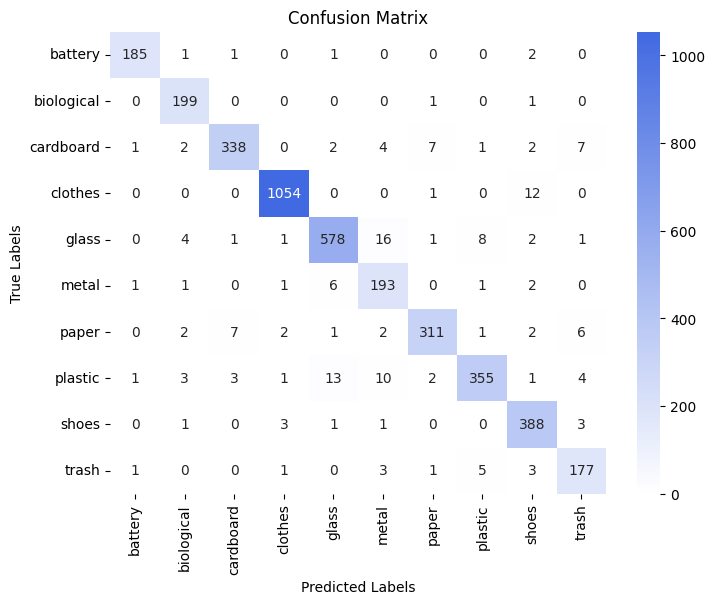

In [66]:
evaluate_model_performance(custom_resnet50_model, test_ds, class_labels)